# Methode Oudeyer

C:\Users\brieu\AppData\Local\Temp\ipykernel_24472\4035818762.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.random.choice(valeur, 1, p=list))


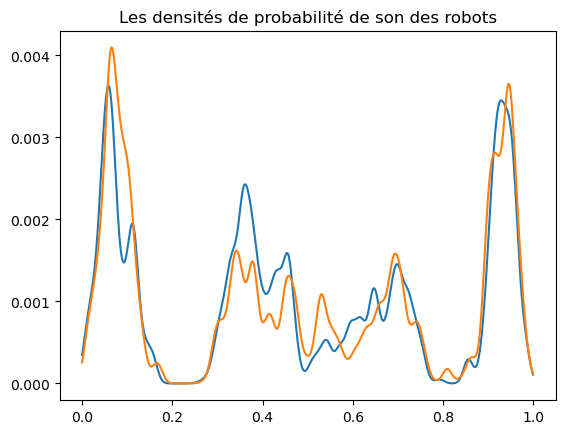

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np


#1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)


n = 1000
robot1, robot2 = np.array([1/n for i in range (n)]), np.array([1/n for i in range (n)])
valeur = np.linspace(0, 1, n)
sigma = 0.01
poids = 0.000005
n_test = 100000



def tirage(list):
    return float(np.random.choice(valeur, 1, p=list))


def update(list, mu):
    gauss = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - ((np.linspace(0, 1, n)) - float(mu))**2 / (2 * sigma**2))
    list = (list + (poids*gauss))
    list = list / np.sum(list)
    return list

t1 = (tirage(robot1))
t2 = (tirage(robot2))

for i in range (n_test) :
    t = tirage(robot1)
    while abs(t-t1) < 0.2:
        t = tirage(robot2)
    t1 = t
    robot2 = update(robot2, t1)

    t = tirage(robot2)
    while abs(t-t2) < 0.2:
        t = tirage(robot1)
    t2 = t
    robot1 = update(robot1, tirage(robot2))


mu = 0.5
gauss = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - ((np.linspace(0, 1, n)) - float(mu))**2 / (2 * sigma**2))
plt.plot(valeur, robot1, label ="robot 1")
plt.plot(valeur, robot2, label ="robot 2")
plt.title("Les densités de probabilité de son des robots")
plt.show()
